In [3]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
dft1=pd.read_csv('test.csv')

In [5]:
dft1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
combine=[df1,dft1]

In [7]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [8]:
guess_ages=np.zeros((2,3))

In [9]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & 
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
            print(age_guess)

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            print(guess_ages)
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df1.head()

40.0
[[40.  0.  0.]
 [ 0.  0.  0.]]
30.0
[[40. 30.  0.]
 [ 0.  0.  0.]]
25.0
[[40. 30. 25.]
 [ 0.  0.  0.]]
35.0
[[40. 30. 25.]
 [35.  0.  0.]]
28.0
[[40. 30. 25.]
 [35. 28.  0.]]
21.5
[[40.  30.  25. ]
 [35.  28.  21.5]]
42.0
[[42.  30.  25. ]
 [35.  28.  21.5]]
28.0
[[42.  28.  25. ]
 [35.  28.  21.5]]
24.0
[[42.  28.  24. ]
 [35.  28.  21.5]]
41.0
[[42.  28.  24. ]
 [41.  28.  21.5]]
24.0
[[42.  28.  24. ]
 [41.  24.  21.5]]
22.0
[[42. 28. 24.]
 [41. 24. 22.]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [10]:

df1[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
df1[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [12]:
df1[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
df1[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
df1=df1.drop(['Ticket','Cabin'],axis=1)

In [15]:
dft1=dft1.drop(['Ticket','Cabin'],axis=1)

In [16]:
df1.shape

(891, 10)

In [17]:
dft1.shape

(418, 9)

In [18]:
combine=[df1,dft1]

In [19]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [20]:
pd.crosstab(df1['Title'],df1['Sex'],)

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [21]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

df1[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [23]:
df1=df1.drop(['Name','PassengerId'],axis=1)
dft1=dft1.drop(['Name'],axis=1)
combine=[df1,dft1]
df1.shape,dft1.shape

((891, 9), (418, 9))

In [24]:
df1['AgeBand']=pd.cut(df1['Age'],5)

In [25]:
df1[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4

In [27]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
df1=df1.drop(['AgeBand'],axis=1)
combine=[df1,dft1]

In [29]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

In [30]:
df1[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone'] =1

In [32]:
df1=df1.drop(['SibSp','Parch','FamilySize'],axis=1)
dft1=dft1.drop(['SibSp','Parch','FamilySize'],axis=1)
combine=[df1,dft1]

In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [34]:
df1.loc[:,['Age*Class','Age','Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [35]:
freq_report=df1.Embarked.mode()[0]

In [36]:
freq_report

'S'

In [37]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_report)

In [38]:
df1[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [40]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [41]:
dft1['Fare'].fillna(df1['Fare'].median(),inplace=True)

In [42]:
df1['FareBand']=pd.qcut(df1['Fare'],4)

In [43]:
df1[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df1 = df1.drop(['FareBand'], axis=1)
combine = [df1, dft1]

In [45]:
df1.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [46]:
dft1.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df1.drop('Survived',axis=1)
Y=df1['Survived']

In [49]:
X_train,X_validate,Y_train,Y_validate=train_test_split(X,Y,test_size=0.2,random_state=1)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg=LogisticRegression()

In [52]:
logreg.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
Y_pred=logreg.predict(X_validate)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
np.sqrt(mean_squared_error(Y_validate,Y_pred))

0.47271945924706543

In [56]:
acc_log=round(logreg.score(X_train,Y_train)*100,2)

In [57]:
confusion_matrix(Y_validate,Y_pred)

array([[89, 17],
       [23, 50]], dtype=int64)

In [58]:
print(classification_report(Y_validate,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179



In [59]:
acc_log

82.02

In [60]:
coeff_df=pd.DataFrame(df1.columns.delete(0))
coeff_df.columns=['Feature']

In [61]:
coeff_df['Correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.157167
5,Title,0.499224
4,Embarked,0.265862
6,IsAlone,0.104533
3,Fare,-0.124236
7,Age*Class,-0.181015
2,Age,-0.182816
0,Pclass,-1.077101


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
decision_tree=DecisionTreeClassifier()

In [64]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
Y_pred_dt=decision_tree.predict(X_validate)

In [66]:
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)

In [67]:
acc_decision_tree

87.22

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
confusion_matrix(Y_validate,Y_pred_dt)

array([[97,  9],
       [30, 43]], dtype=int64)

In [70]:
print(classification_report(Y_validate,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       106
           1       0.83      0.59      0.69        73

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179



In [71]:
from sklearn.pipeline import Pipeline

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

In [74]:
sc = StandardScaler()

In [75]:
dtreeClf = DecisionTreeClassifier()

In [76]:
pipe = Pipeline(steps=[('sc',sc),('dtreeClf',dtreeClf)])

In [77]:
criterion = ['gini','entropy']

In [78]:
max_depth = [3,4,5]

In [79]:
parameters = dict(dtreeClf__criterion = criterion,
                 dtreeClf__max_depth = max_depth)

In [80]:
clf = GridSearchCV(pipe,parameters)

In [81]:
clf.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('dtreeClf',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
     

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
CV_Result = cross_val_score(clf,X_train,Y_train,cv=3,n_jobs=-1,scoring='accuracy')

In [84]:
print(CV_Result)

[0.79411765 0.83193277 0.81779661]


In [85]:
print(CV_Result.mean())

0.8146156767791863


In [86]:
print(CV_Result.std())

0.015600954938239358


## Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth.

To reiterate, a grid search scheme consists of:

- an estimator (classifier such as SVC() or decision tree)
- a parameter space
- a method for searching or sampling candidates (optional) 
- a cross-validation scheme, and
- a score function (accuracy, roc_auc etc.)

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [88]:
#specify number of folds for k-fold CV
n_folds = 5

In [89]:
#parameters to build the model on
parameters = {'max_depth':range(1,40)}

In [90]:
#instantiate the model
dtree = DecisionTreeClassifier(criterion = 'gini',random_state=100)

In [91]:
tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score = 'warn')

In [92]:
tree.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring

In [93]:
#scores of GridSearchCV
scores = tree.cv_results_

In [94]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003398,0.000800,0.002199,7.464681e-04,1,{'max_depth': 1},0.748252,0.776224,0.804196,0.788732,...,0.782303,0.019324,38,0.803163,0.792619,0.789104,0.792982,0.791594,0.793892,0.004829
1,0.004276,0.001466,0.002372,1.005124e-03,2,{'max_depth': 2},0.748252,0.790210,0.811189,0.788732,...,0.782303,0.020934,38,0.803163,0.799649,0.799649,0.805263,0.809107,0.803366,0.003584
2,0.003405,0.000490,0.002395,1.020827e-03,3,{'max_depth': 3},0.825175,0.811189,0.839161,0.809859,...,0.814607,0.017284,5,0.836555,0.831283,0.833040,0.821053,0.840630,0.832512,0.006563
3,0.004464,0.001439,0.001199,4.008085e-04,4,{'max_depth': 4},0.755245,0.811189,0.839161,0.788732,...,0.797753,0.027606,37,0.850615,0.836555,0.833040,0.833333,0.844133,0.839535,0.006833
4,0.002202,0.000398,0.001000,7.599534e-07,5,{'max_depth': 5},0.804196,0.804196,0.825175,0.838028,...,0.817416,0.012949,2,0.861160,0.852373,0.852373,0.845614,0.851138,0.852531,0.004986


In [95]:
import matplotlib.pyplot as plt

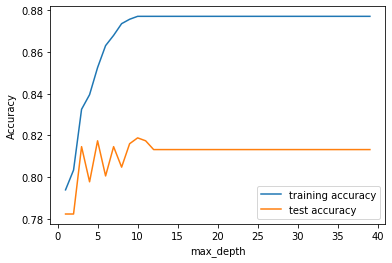

In [96]:
plt.figure()
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Tuning min_samples_leaf

The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).

Let's see what will be the optimum value for min_samples_leaf.

In [97]:
#specify number of folds for k-fold CV
n_folds = 5

#parameters to build the model on
parameters = {'min_samples_leaf':range(5,200,20)}

#instantiate the model
dtree = DecisionTreeClassifier(criterion='gini',random_state=100)

#fit tree on training data
tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score='warn')

tree.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='wa

In [98]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003398,0.000486,0.002002,6.334968e-04,5,{'min_samples_leaf': 5},0.797203,0.804196,0.839161,0.795775,...,0.808989,0.015818,2,0.855888,0.841828,0.848858,0.849123,0.851138,0.849367,0.004535
1,0.004200,0.001723,0.002163,4.218192e-04,25,{'min_samples_leaf': 25},0.776224,0.804196,0.839161,0.830986,...,0.804775,0.027159,3,0.831283,0.826011,0.822496,0.824561,0.833625,0.827595,0.004188
2,0.002609,0.000791,0.001205,4.116062e-04,45,{'min_samples_leaf': 45},0.839161,0.790210,0.839161,0.845070,...,0.817416,0.029680,1,0.817223,0.817223,0.817223,0.815789,0.833625,0.820217,0.006727
3,0.002795,0.000398,0.000999,1.507891e-07,65,{'min_samples_leaf': 65},0.748252,0.790210,0.811189,0.788732,...,0.782303,0.020934,4,0.803163,0.799649,0.799649,0.805263,0.809107,0.803366,0.003584
4,0.002391,0.000488,0.000999,5.091228e-07,85,{'min_samples_leaf': 85},0.748252,0.790210,0.811189,0.788732,...,0.782303,0.020934,4,0.803163,0.799649,0.799649,0.805263,0.809107,0.803366,0.003584


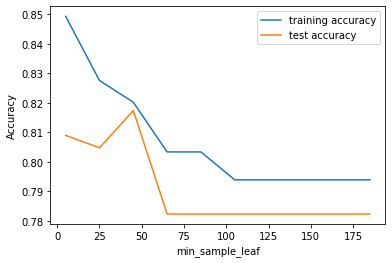

In [99]:
#plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label='test accuracy')
plt.xlabel('min_sample_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values near 50, the model accuracy tends to be at maximum.

## Tuning min_samples_split

The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [100]:
#specify number of folds for k-fold CV
n_folds = 5

#parameters to build the model on
parameters = {'min_samples_split': range(5,200,20)}

#instantiate the model
dtree = DecisionTreeClassifier(criterion='gini',random_state=100)

#fit tree on training data
tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score='warn')

tree.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='w

In [101]:
#scores of GridSearchCV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003804,0.000752,0.001806,0.000404,5,{'min_samples_split': 5},0.818182,0.811189,0.825175,0.795775,...,0.816011,0.011905,1,0.871705,0.869947,0.873462,0.870175,0.875657,0.872189,0.002143
1,0.004404,0.000482,0.001996,0.001095,25,{'min_samples_split': 25},0.804196,0.811189,0.818182,0.816901,...,0.811798,0.005215,3,0.850615,0.833040,0.848858,0.840351,0.844133,0.843399,0.006309
2,0.002926,0.000655,0.001001,0.000004,45,{'min_samples_split': 45},0.783217,0.811189,0.818182,0.838028,...,0.810393,0.018136,4,0.845343,0.833040,0.847100,0.836842,0.842382,0.840941,0.005265
3,0.002804,0.000402,0.001002,0.000006,65,{'min_samples_split': 65},0.776224,0.804196,0.839161,0.795775,...,0.800562,0.021462,5,0.841828,0.826011,0.833040,0.829825,0.840630,0.834267,0.006117
4,0.002982,0.000039,0.001001,0.000006,85,{'min_samples_split': 85},0.825175,0.804196,0.839161,0.809859,...,0.813202,0.017782,2,0.836555,0.826011,0.833040,0.821053,0.840630,0.831458,0.007079


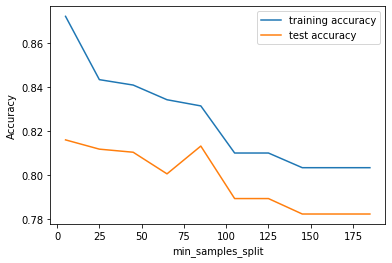

In [102]:
#plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores['param_min_samples_split'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_min_samples_split'],
        scores['mean_test_score'],
        label='test accuracy')
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show()

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [103]:
#creating the parameter grid

param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(25,100,25),
    'min_samples_split': range(25,125,25),
    'criterion': ['entropy','gini']
}

n_folds = 5

dtree = DecisionTreeClassifier()
grid_search=GridSearchCV(estimator = dtree,param_grid = param_grid,cv=n_folds,verbose = 1)

grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [104]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [105]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003201,4.067195e-04,0.001597,4.877846e-04,entropy,5,25,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.776224,0.811189,0.839161,0.830986,0.77305,0.806180,0.027273,9
1,0.003397,1.496134e-03,0.002199,4.004008e-04,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.776224,0.811189,0.839161,0.830986,0.77305,0.806180,0.027273,9
2,0.004020,1.581217e-03,0.001597,4.890858e-04,entropy,5,25,75,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.825175,0.811189,0.839161,0.830986,0.77305,0.816011,0.023225,1
3,0.003601,1.356497e-03,0.001798,3.991217e-04,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.825175,0.811189,0.839161,0.830986,0.77305,0.816011,0.023225,1
4,0.010994,1.699589e-02,0.001199,3.995900e-04,entropy,5,50,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.839161,0.788732,0.77305,0.792135,0.031277,17
5,0.001999,1.907349e-07,0.001799,3.996372e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.839161,0.788732,0.77305,0.792135,0.031277,17
6,0.002199,3.998043e-04,0.001199,3.997327e-04,entropy,5,50,75,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.839161,0.788732,0.77305,0.792135,0.031277,17
7,0.002197,4.008222e-04,0.001000,1.091530e-06,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.839161,0.788732,0.77305,0.792135,0.031277,17
8,0.002200,3.983376e-04,0.001200,3.996136e-04,entropy,5,75,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.811189,0.788732,0.77305,0.786517,0.023989,33
9,0.002281,3.926097e-04,0.000970,6.527056e-05,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748252,0.811189,0.811189,0.788732,0.77305,0.786517,0.023989,33


In [106]:
#printing the optimal accuracy score and hyperparameters
print('best accuracy',grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8160112359550562
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=75,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [107]:
clf_gini = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=100,min_samples_leaf=25,
                                 min_samples_split=75)

In [108]:
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=75,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [109]:
clf_gini.score(X_validate,Y_validate)

0.7653631284916201

In [110]:
Y_pred = clf_gini.predict(X_validate)

In [111]:
confusion_matrix(Y_validate,Y_pred)

array([[96, 10],
       [32, 41]], dtype=int64)

In [112]:
print(classification_report(Y_validate,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       106
           1       0.80      0.56      0.66        73

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179



## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)

In [115]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
Y_pred = knn.predict(X_validate)

In [117]:
confusion_matrix(Y_validate,Y_pred)

array([[97,  9],
       [27, 46]], dtype=int64)

In [118]:
print(classification_report(Y_validate,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.84      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [119]:
precision_score(Y_validate,Y_pred)

0.8363636363636363

In [120]:
precision=[]
for i in range(3,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_validate)
    x = precision_score(Y_validate,Y_pred)
    precision.append(x)
print(precision)

[0.7966101694915254, 0.868421052631579, 0.8363636363636363, 0.8431372549019608, 0.8113207547169812, 0.8076923076923077, 0.8113207547169812, 0.803921568627451, 0.7543859649122807, 0.7592592592592593, 0.7368421052631579, 0.7777777777777778]


In [121]:
df = pd.DataFrame(range(3,15),columns=['neighbors'])

In [122]:
df['Precision'] = precision

<Figure size 1440x1440 with 0 Axes>

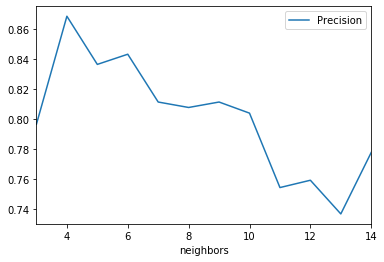

In [123]:
fig = plt.figure(figsize=(20,20))
df.plot('neighbors','Precision')
plt.show()

In [124]:
knn = KNeighborsClassifier(n_neighbors=4,p=1)

In [125]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='uniform')

In [126]:
Y_pred = knn.predict(X_validate)

In [127]:
confusion_matrix(Y_validate,Y_pred)

array([[101,   5],
       [ 40,  33]], dtype=int64)

## Grid search CV

In [128]:
params = {
    'leaf_size' : range(5,105,10),
    'n_neighbors' : range(1,10),
    'p': [1,2,3]
}

n_folds = 5

In [129]:
grid_search = GridSearchCV(estimator=knn,param_grid=params,cv=n_folds,verbose=1)

In [130]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   15.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=1,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': range(5, 105, 10),
                         'n_neighbors': range(1, 10), 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [131]:
result = pd.DataFrame(grid_search.cv_results_)

In [132]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004597,0.001356,0.010194,0.001599,5,1,1,"{'leaf_size': 5, 'n_neighbors': 1, 'p': 1}",0.762238,0.783217,0.797203,0.809859,0.808511,0.792135,0.017788,240
1,0.003199,0.000747,0.009082,0.001844,5,1,2,"{'leaf_size': 5, 'n_neighbors': 1, 'p': 2}",0.762238,0.783217,0.797203,0.809859,0.815603,0.793539,0.019246,238
2,0.002998,0.000001,0.010150,0.002337,5,1,3,"{'leaf_size': 5, 'n_neighbors': 1, 'p': 3}",0.762238,0.783217,0.797203,0.809859,0.815603,0.793539,0.019246,238
3,0.002799,0.000400,0.007595,0.000799,5,2,1,"{'leaf_size': 5, 'n_neighbors': 2, 'p': 1}",0.804196,0.804196,0.804196,0.802817,0.787234,0.800562,0.006644,172
4,0.002599,0.000490,0.007395,0.000490,5,2,2,"{'leaf_size': 5, 'n_neighbors': 2, 'p': 2}",0.804196,0.804196,0.804196,0.795775,0.794326,0.800562,0.004497,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.002604,0.000493,0.007308,0.000404,95,8,2,"{'leaf_size': 95, 'n_neighbors': 8, 'p': 2}",0.804196,0.811189,0.825175,0.816901,0.780142,0.807584,0.015281,99
266,0.002393,0.000485,0.015731,0.001062,95,8,3,"{'leaf_size': 95, 'n_neighbors': 8, 'p': 3}",0.804196,0.811189,0.818182,0.816901,0.780142,0.806180,0.013855,111
267,0.003104,0.000679,0.007198,0.000752,95,9,1,"{'leaf_size': 95, 'n_neighbors': 9, 'p': 1}",0.776224,0.818182,0.811189,0.802817,0.808511,0.803371,0.014479,138
268,0.002607,0.000497,0.007519,0.000547,95,9,2,"{'leaf_size': 95, 'n_neighbors': 9, 'p': 2}",0.776224,0.811189,0.811189,0.816901,0.787234,0.800562,0.015898,172


In [133]:
print('Best Accuracy',grid_search.best_score_)

Best Accuracy 0.8216292134831461


In [134]:
print(grid_search.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


In [135]:
knn = KNeighborsClassifier(leaf_size=5,n_neighbors=6)

In [136]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [137]:
Y_pred = knn.predict(X_validate)

In [138]:
precision_score(Y_validate,Y_pred)

0.8431372549019608

In [139]:
confusion_matrix(Y_validate,Y_pred)

array([[98,  8],
       [30, 43]], dtype=int64)

In [140]:
from sklearn.metrics import recall_score

In [141]:
recall_score(Y_validate,Y_pred)

0.589041095890411

In [142]:
leafs = range(1,10,)
neighbors = range(1,10)
ps = [1,2,3]

In [143]:
precision = []
recall = []
for leaf,neighbor in zip(leafs,neighbors):
    print(leaf)
    print(neighbor)
    knn = KNeighborsClassifier(leaf_size=leaf,n_neighbors=neighbor)
    model = knn.fit(X_train,Y_train)
    pred = knn.predict(X_validate)
    x = precision_score(Y_validate,Y_pred)
    y = recall_score(Y_validate,Y_pred)
    precision.append(x)
    recall.append(y)

print(precision)
print(recall)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
[0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411, 0.589041095890411]


In [144]:
accuracy_score(Y_validate,Y_pred)

0.7877094972067039

In [145]:
logreg.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
Y_pred = logreg.predict(X_validate)

In [147]:
accuracy_score(Y_validate,Y_pred)

0.776536312849162

In [148]:
test = pd.read_csv('test.csv')

In [149]:
logreg.fit(X,Y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
test = test.drop(['Ticket','Cabin','Name'],axis=1)

In [151]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [152]:
X

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...
886,2,0,1,1,0,5,1,2
887,1,1,1,2,0,2,1,1
888,3,1,1,2,0,2,0,3
889,1,0,1,2,1,1,1,1


In [153]:
dft = dft1.drop('PassengerId',axis=1)

In [154]:
prediction = logreg.predict(dft)

In [155]:
submit = pd.DataFrame(prediction)

In [156]:
submit['PassengerId'] = dft1['PassengerId']

In [157]:
submit.rename(columns={0:'Survived'},inplace=True)

In [158]:
submit.columns

Index(['Survived', 'PassengerId'], dtype='object')

In [159]:
submit = submit[['PassengerId','Survived']]

In [160]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [161]:
submit.to_csv('Final.csv')

In [162]:
penalty=['l1','l2']
tol = [0.0001,0.001,0.01,0.1,1,10,100,1000]
class_weight = [{1:0.5,0:0.5},{1:0.4,0:0.6},{1:0.6,0:0.4},{1:0.7,0:0.3},{1:0.3,0:0.7}]
solver = ('liblinear','saga')

In [163]:
param_grid = {'penalty' : penalty,
              'tol':tol,
              'class_weight' : class_weight,
             'solver' : solver}

In [164]:
grid = GridSearchCV(estimator=logreg,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   verbose=1,
                   n_jobs=-1)

In [165]:
grid_result = grid.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    3.3s finished


In [166]:
grid_result.best_score_

0.8643368702531622

In [167]:
grid_result.best_estimator_

LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [168]:
logreg = LogisticRegression(class_weight= {1:0.3,0:0.7},
                           penalty='l2',
                           solver='liblinear',
                           tol=0.001)

In [169]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [170]:
Y_pred=logreg.predict(X_validate)

In [171]:
confusion_matrix(Y_validate,Y_pred)

array([[102,   4],
       [ 39,  34]], dtype=int64)

In [172]:
accuracy_score(Y_validate,Y_pred)

0.7597765363128491

In [173]:
recall_score(Y_validate,Y_pred)

0.4657534246575342

In [174]:
precision_score(Y_validate,Y_pred)

0.8947368421052632

In [175]:
from sklearn.metrics import roc_curve,roc_auc_score

In [176]:
Y_score = logreg.predict_proba(X_validate)[:,1]

In [177]:
false_positive_rate,true_positive_rate,threshold = roc_curve(Y_validate,Y_score)

In [178]:
roc_auc_score(Y_validate,Y_score)

0.8167485138278625

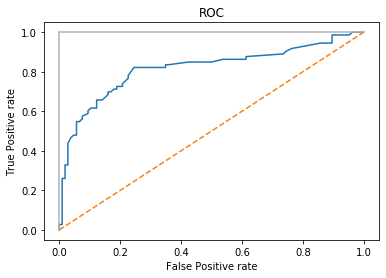

In [179]:
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7')
plt.plot([1,1],c='.7')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [180]:
dft = dft1.drop('PassengerId',axis=1)

In [181]:
prediction = logreg.predict(dft)

In [182]:
submit = pd.DataFrame(prediction)

In [183]:
submit['PassengerId']=dft1['PassengerId']

In [184]:
submit.rename(columns={0:'Survived'},inplace=True)

In [185]:
submit = submit[['PassengerId','Survived']]

In [186]:
submit.to_csv('logreg_gridsearch')

In [187]:
from sklearn.ensemble import GradientBoostingRegressor

In [188]:
from sklearn.metrics import mean_squared_error

In [189]:
from sklearn.metrics import mean_absolute_error

In [190]:
regressor = GradientBoostingRegressor(max_depth = 2,n_estimators = 8, learning_rate = 1.0)


In [191]:
regressor.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=8,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [192]:
errors = [mean_squared_error(Y_validate,Y_pred) for Y_pred in regressor.staged_predict(X_validate)]

In [193]:
errors

[0.1700032076760969,
 0.1593638682074498,
 0.15784398276307768,
 0.16332792938717644,
 0.16165875136825195,
 0.15880994416829441,
 0.15849838312398679,
 0.15954330923140633]

In [194]:
best_n_estimators = np.argmin(errors)

In [195]:
best_n_estimators

2

In [196]:
best_regressor = GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimators,learning_rate=1.0)

In [197]:
best_regressor.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [198]:
Y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [199]:
Y_pred = best_regressor.predict(X_validate)

In [200]:
mean_squared_error(Y_validate,Y_pred)

0.15936386820744977

In [201]:
mean_absolute_error(Y_validate,Y_pred)

0.30485038449509955

In [202]:
Y_pred

array([ 8.73684989e-01,  8.54072579e-02,  8.73684989e-01,  5.56549042e-01,
        8.73684989e-01,  8.54072579e-02,  8.54072579e-02,  8.73684989e-01,
        4.08847995e-01,  5.56549042e-01,  8.54072579e-02,  4.61425263e-01,
        3.13724216e-01,  8.54072579e-02,  5.56549042e-01,  3.13724216e-01,
        4.61425263e-01,  8.54072579e-02,  8.54072579e-02,  8.73684989e-01,
        8.54072579e-02,  1.80531037e-01,  9.68808768e-01,  8.54072579e-02,
        5.56549042e-01,  8.54072579e-02,  9.68808768e-01,  8.73684989e-01,
        8.54072579e-02,  8.73684989e-01,  4.61425263e-01,  3.13724216e-01,
        4.61425263e-01,  4.61425263e-01,  1.80531037e-01,  4.61425263e-01,
        3.13724216e-01,  8.54072579e-02,  4.08847995e-01,  8.54072579e-02,
        4.61425263e-01,  4.61425263e-01,  8.73684989e-01,  3.13724216e-01,
        9.68808768e-01,  8.54072579e-02,  4.61425263e-01,  8.54072579e-02,
        4.08847995e-01,  8.54072579e-02,  1.80531037e-01,  8.73684989e-01,
        8.54072579e-02,  

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

In [204]:
clf = GradientBoostingClassifier(max_depth=2,n_estimators=5,learning_rate=1.0)

In [205]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [206]:
Y_pred = clf.predict(X_validate)

In [207]:
confusion_matrix(Y_validate,Y_pred)

array([[96, 10],
       [32, 41]], dtype=int64)

In [208]:
print(classification_report(Y_validate,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       106
           1       0.80      0.56      0.66        73

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179



In [209]:
accuracy_score(Y_validate,Y_pred)

0.7653631284916201

In [210]:
grid_params = {'max_depth' : range(1,6),
           'n_estimators' : range(1,9),
           'learning_rate' : [0.01,0.1,1,10,100]}

In [211]:
grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                   param_grid = grid_params,
                   cv = 5,
                   verbose = 1)

In [212]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.5s finished
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [213]:
grid.best_score_

0.8286516853932584

In [214]:
grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=8,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [215]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 8}

In [216]:
clf = GradientBoostingClassifier(learning_rate = 0.1,max_depth = 3, n_estimators = 8)

In [217]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=8,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [218]:
Y_pred = clf.predict(X_validate)

In [219]:
accuracy_score(Y_validate,Y_pred)

0.7597765363128491

In [220]:
from sklearn.metrics import f1_score

In [221]:
f1_score(Y_validate,Y_pred)

0.6055045871559632

In [222]:
from sklearn.feature_selection import RFE

In [223]:
nof_list = np.arange(1,9)
high_score = 0
nof = 0
score_list = []
for n in range(len(nof_list)):
    rfe = RFE(clf,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_validate_rfe = rfe.transform(X_validate)
    clf.fit(X_train_rfe,Y_train)
    score = clf.score(X_validate_rfe,Y_validate)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof=nof_list[n]
print('Optimum number of features: %d'%nof)
print('Score with %d features: %f'%(nof,high_score))

Optimum number of features: 4
Score with 4 features: 0.759777


In [224]:
cols = list(X.columns)
rfe = RFE(clf,4)
X_rfe = rfe.fit_transform(X,Y)
clf.fit(X_rfe,Y)
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pclass', 'Sex', 'Fare', 'Title'], dtype='object')


In [225]:
X_final = X[['Pclass','Sex','Fare','Title']]
Y_final = Y

In [226]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.3,random_state=100)

In [227]:
model = clf.fit(X_train,Y_train)

In [228]:
Y_pred = model.predict(X_test)

In [229]:
confusion_matrix(Y_test,Y_pred)

array([[154,   5],
       [ 52,  57]], dtype=int64)

In [230]:
accuracy_score(Y_test,Y_pred)

0.7873134328358209

In [231]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       159
           1       0.92      0.52      0.67       109

    accuracy                           0.79       268
   macro avg       0.83      0.75      0.76       268
weighted avg       0.82      0.79      0.77       268



In [232]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [233]:
Y_pred_log = logreg.predict(X_test)

In [234]:
confusion_matrix(Y_test,Y_pred_log)

array([[157,   2],
       [ 62,  47]], dtype=int64)

In [235]:
accuracy_score(Y_test,Y_pred_log)

0.7611940298507462

In [236]:
target_names = ['Class: 0','Class: 1']

In [237]:
print(classification_report(Y_test,Y_pred_log,target_names = target_names))

              precision    recall  f1-score   support

    Class: 0       0.72      0.99      0.83       159
    Class: 1       0.96      0.43      0.59       109

    accuracy                           0.76       268
   macro avg       0.84      0.71      0.71       268
weighted avg       0.82      0.76      0.73       268



In [238]:
knn = KNeighborsClassifier(leaf_size=5,n_neighbors=6)

In [239]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [240]:
Y_pred_knn = knn.predict(X_test)

In [241]:
confusion_matrix(Y_test,Y_pred_knn)

array([[155,   4],
       [ 57,  52]], dtype=int64)

In [242]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       159
           1       0.93      0.48      0.63       109

    accuracy                           0.77       268
   macro avg       0.83      0.73      0.73       268
weighted avg       0.81      0.77      0.75       268



In [243]:
accuracy_score(Y_test,Y_pred_knn)

0.7723880597014925

In [244]:
final = pd.DataFrame(dft1['PassengerId'],columns=['PassengerId','Survived'])

In [245]:
survive = logreg.predict(dft[['Pclass', 'Sex', 'Fare', 'Title']])

In [246]:
final['Survived'] = survive

In [247]:
final.to_csv('final_logreg_rfe.csv')

In [248]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [249]:
kfold = model_selection.KFold(n_splits=10,random_state = 100)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator = cart, n_estimators = num_trees,random_state=100)

In [250]:
results = model_selection.cross_val_score(model,X,Y,cv=kfold)

In [251]:
print(results.mean())

0.7991885143570536


In [252]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [253]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [254]:
import xgboost as xgb

In [255]:
data_dmatrix = xgb.DMatrix(data = X, label = Y)

In [256]:
data_dmatrix

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 100)

In [265]:
xg_clf = xgb.XGBClassifier(objective = 'reg:logistic',colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
                           n_estimators = 10)

In [266]:
xg_clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [268]:
Y_pred = xg_clf.predict(X_test)

In [269]:
accuracy_score(Y_test,Y_pred)

0.7653631284916201

In [271]:
confusion_matrix(Y_test,Y_pred)

array([[99,  5],
       [37, 38]], dtype=int64)

In [273]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       104
           1       0.88      0.51      0.64        75

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179

